**Öğrenilmiş Q-Tablosunu**

In [1]:
import numpy as np

# Ortam ayarları
n_states = 25  # 5x5 ızgara
n_actions = 4  # 0: yukarı, 1: aşağı, 2: sağa, 3: sola
goal_state = 24  # Hedefin konumu (5. satır, 5. sütun)

# Q-Tablosu: Durumlar ve eylemler için
Q = np.zeros((n_states, n_actions))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [2]:
# Öğrenme parametreleri
learning_rate = 0.1
discount_rate = 0.99
episodes = 1000  # Toplam deneme sayısı
max_steps = 100  # Her bölüm için maksimum adım sayısı


In [3]:
# Eylem fonksiyonu: Ajanın yeni durumunu belirler
def take_action(state, action):
    row = state // 5  # Satır numarası
    col = state % 5   # Sütun numarası
    if action == 0 and row > 0:  # Yukarı
        return state - 5
    if action == 1 and row < 4:  # Aşağı
        return state + 5
    if action == 2 and col < 4:  # Sağa
        return state + 1
    if action == 3 and col > 0:  # Sola
        return state - 1
    return state  # Eğer hareket geçersizse, aynı durumda kal


In [4]:
# Rastgele bir eylem seçme
def choose_action(state):
    return np.random.choice(range(n_actions))


In [5]:
# Öğrenme süreci
for episode in range(episodes):
    state = 0  # Başlangıç durumu
    for step in range(max_steps):
        action = choose_action(state)
        next_state = take_action(state, action)
        reward = 1 if next_state == goal_state else 0
        # Q-Değerini güncelleme
        Q[state, action] = Q[state, action] + learning_rate * (reward + discount_rate * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state
        if state == goal_state:
            break


In [6]:
# Öğrenilmiş Q-Tablosunu göster
Q

array([[0.92274469, 0.93206535, 0.93206535, 0.92274469],
       [0.93206535, 0.94148015, 0.94148015, 0.92274469],
       [0.94148015, 0.95099005, 0.95099005, 0.93206535],
       [0.95099005, 0.96059601, 0.96059601, 0.94148015],
       [0.96059601, 0.970299  , 0.96059601, 0.95099005],
       [0.92274469, 0.94148015, 0.94148015, 0.93206535],
       [0.93206535, 0.95099005, 0.95099005, 0.93206535],
       [0.94148015, 0.96059601, 0.96059601, 0.94148015],
       [0.95099005, 0.970299  , 0.970299  , 0.95099005],
       [0.96059601, 0.9801    , 0.970299  , 0.96059601],
       [0.93206535, 0.95099005, 0.95099005, 0.94148015],
       [0.94148015, 0.96059601, 0.96059601, 0.94148015],
       [0.95099005, 0.970299  , 0.970299  , 0.95099005],
       [0.96059601, 0.9801    , 0.9801    , 0.96059601],
       [0.970299  , 0.99      , 0.9801    , 0.970299  ],
       [0.94148015, 0.96059601, 0.96059601, 0.95099005],
       [0.95099005, 0.970299  , 0.970299  , 0.95099005],
       [0.96059601, 0.9801    ,

**İnteraktif bir Q Öğrenme Tablosu**

In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Ortam ve Q-tablosu hazırlığı (Önceki adımlarda tanımlandı)

# Izgara boyutu
grid_size = 5

# Başlangıç durumu
start_state = 0

# Hedef durumu
goal_state = 24

# Izgarayı çizdirme
def plot_grid(state):
    grid = np.zeros((grid_size, grid_size))
    row, col = divmod(state, grid_size)
    grid[row, col] = 0.5  # Ajanın konumu
    grid[goal_state // grid_size, goal_state % grid_size] = 0.75  # Hedef
    return grid


In [8]:
# Animasyon için adımları hesaplama
def compute_steps(Q):
    state = start_state
    steps = [state]
    while state != goal_state and len(steps) <= grid_size ** 2:
        action = np.argmax(Q[state, :])
        state = take_action(state, action)
        steps.append(state)
    return steps

steps = compute_steps(Q)


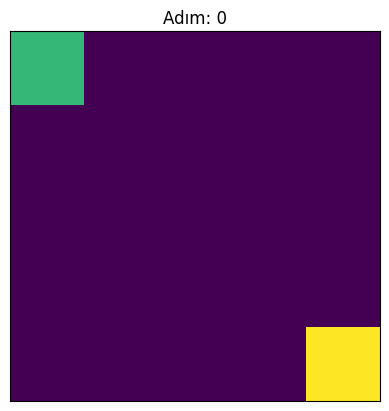

In [11]:
# Animasyon fonksiyonu
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    grid = plot_grid(steps[i])
    ax.imshow(grid, cmap='viridis')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Adım: {i}")

ani = animation.FuncAnimation(fig, animate, frames=len(steps), interval=500, repeat=False)

HTML(ani.to_jshtml())

**Kedi-Fare Oyunu**

Basit bir “Kedi-Fare” senaryosu tasarlayacağız. Burada “Kedi” (ajan), belirli bir strateji kullanarak “Fare”ye (hedef) ulaşmaya çalışacak. Bu senaryoda, kedi, farenin yerini bulup ona en kısa yoldan nasıl ulaşacağını öğrenecek. Farenin konumu sabit olacak ve kedi her seferinde farklı bir başlangıç noktasından başlayacak. Bu basit örneği, Q-learning gibi bir RL algoritması kullanmadan simüle edeceğiz, ancak ajanın (kedinin) hedefe (fareye) nasıl “öğrenerek” ulaşabileceğinin temel bir fikrini verecek.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation
from IPython.display import HTML

# Ortam ayarları
grid_size = 10
cat_start = (0, 0)
mouse_position = (grid_size - 1, grid_size - 1)

# Fareyi ve kediyi çizmek için fonksiyon
def draw_grid(cat_pos, mouse_pos):
    fig, ax = plt.subplots()
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.add_patch(patches.Rectangle(mouse_pos, 1, 1, color='green'))  # Fare
    cat_patch = patches.Rectangle(cat_pos, 1, 1, color='blue')  # Kedi
    ax.add_patch(cat_patch)
    return fig, ax, cat_patch

In [13]:
# Kedinin hareketini simüle edecek fonksiyon
def simulate_cat_movement(cat_start, mouse_position):
    cat_path = [cat_start]
    cat_pos = list(cat_start)
    while tuple(cat_pos) != mouse_position:
        if cat_pos[0] < mouse_position[0]:
            cat_pos[0] += 1
        elif cat_pos[0] > mouse_position[0]:
            cat_pos[0] -= 1

        if cat_pos[1] < mouse_position[1]:
            cat_pos[1] += 1
        elif cat_pos[1] > mouse_position[1]:
            cat_pos[1] -= 1

        cat_path.append(tuple(cat_pos))
    return cat_path

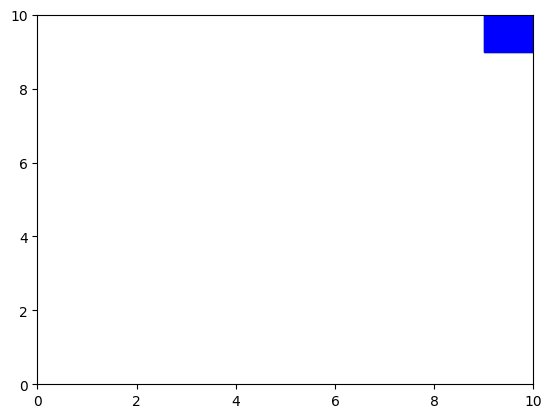

In [14]:
# Kedi hareketini hesapla
cat_path = simulate_cat_movement(cat_start, mouse_position)

# Animasyon fonksiyonu
def update_cat_position(frame, cat_patch, cat_path):
    cat_patch.set_xy(cat_path[frame])
    return cat_patch,

# Animasyonu oluştur
fig, ax, cat_patch = draw_grid(cat_start, mouse_position)
ani = animation.FuncAnimation(fig, update_cat_position, frames=len(cat_path), fargs=(cat_patch, cat_path), blit=True)

# Animasyonu göster
HTML(ani.to_jshtml())